In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

data= pd.read_csv("weatherdata.csv")
data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [98]:
data.drop(['date'],axis=1,inplace=True)

In [99]:
dataset=data.sample(frac=1).reset_index()

In [100]:
dataset.head()

,index,precipitation,temp_max,temp_min,wind,weather
0,282,0.0,16.1,8.9,1.6,drizzle
1,434,0.8,7.8,3.9,1.6,rain
2,449,0.0,16.7,4.4,2.8,sun
3,306,5.6,15.0,10.6,1.0,rain
4,992,0.0,23.9,16.1,2.8,sun


In [101]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1461 non-null   int64  
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 68.6+ KB


In [102]:
dataset.shape

(1461, 6)

In [103]:
dataset.isna().sum()

index            0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [104]:
dataset.nunique()

index            1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [105]:
dataset["weather"].unique()

array(['drizzle', 'rain', 'sun', 'fog', 'snow'], dtype=object)

In [106]:
dataset.weather.value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [107]:
fig = px.histogram(dataset, x="weather",text_auto=True ,color='weather',title='No of weathers with their count').update_xaxes(categoryorder='total ascending')
fig.show()

In [108]:
fig = px.pie(dataset, names="weather",color='weather',title='Different weathers in our dataset with their %')
fig.show()

In [109]:
# classes={
#         'drizzle':0,
#         'fog':1,
#         'rain':2,
#         'snow':3,
#         'sun':4
# }
# dataset['weather']=dataset['weather'].astype('category')
# dataset['weather']=dataset['weather'].cat.codes

In [110]:
dataset['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [111]:
x = dataset[['precipitation','temp_max','temp_min','wind']]
x.head()

,precipitation,temp_max,temp_min,wind
0,0.0,16.1,8.9,1.6
1,0.8,7.8,3.9,1.6
2,0.0,16.7,4.4,2.8
3,5.6,15.0,10.6,1.0
4,0.0,23.9,16.1,2.8


In [112]:
y=dataset['weather']
y.head()

0    drizzle
1       rain
2        sun
3       rain
4        sun
Name: weather, dtype: object

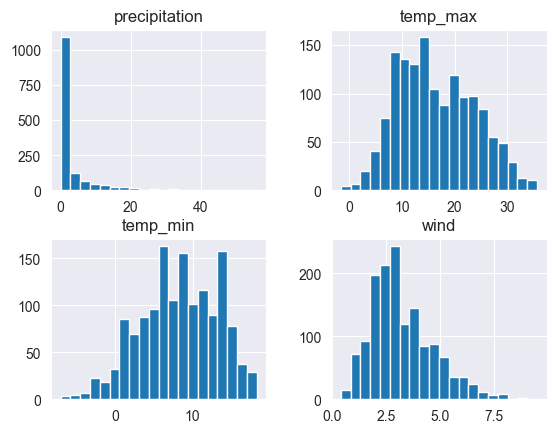

In [113]:
x.hist(bins=20)
plt.show()

In [114]:
print(x.shape)
print(y.shape)

(1461, 4)
(1461,)


Data cleaning done

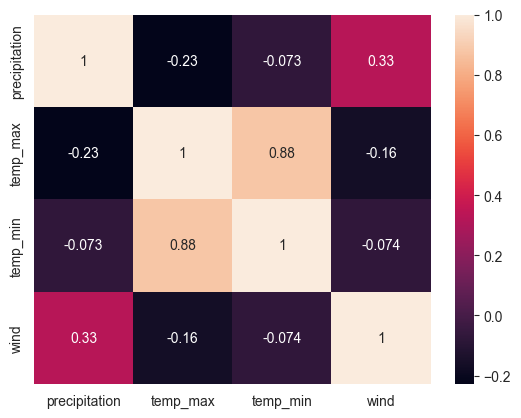

In [115]:
corrMatrix = x.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [116]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =42)

In [117]:
print("Shape of x training data : ",x_train.shape)
print("Shape of y training data : ",y_train.shape)
print("Shape of x testing data : ",x_test.shape)
print("Shape of y testing data : ",y_test.shape)

Shape of x training data :  (1095, 4)
Shape of y training data :  (1095,)
Shape of x testing data :  (366, 4)
Shape of y testing data :  (366,)


In [118]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [119]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(x_train, y_train,sample_weight=None)
y_pred = rf_model.predict(x_test)

In [120]:
correct=0
total=len(y_pred)
for i,j in zip(y_pred, y_test):
    if i==j:
        correct+=1
acc=(correct/total)*100
print("\n"+str(acc)+"\n")


82.24043715846994



In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8224043715846995

              precision    recall  f1-score   support

     drizzle       0.38      0.15      0.21        20
         fog       0.17      0.10      0.12        21
        rain       0.94      0.93      0.94       162
        snow       1.00      0.43      0.60         7
         sun       0.78      0.91      0.84       156

    accuracy                           0.82       366
   macro avg       0.65      0.50      0.54       366
weighted avg       0.80      0.82      0.80       366

[[  3   3   0   0  14]
 [  0   2   1   0  18]
 [  1   1 151   0   9]
 [  0   0   4   3   0]
 [  4   6   4   0 142]]


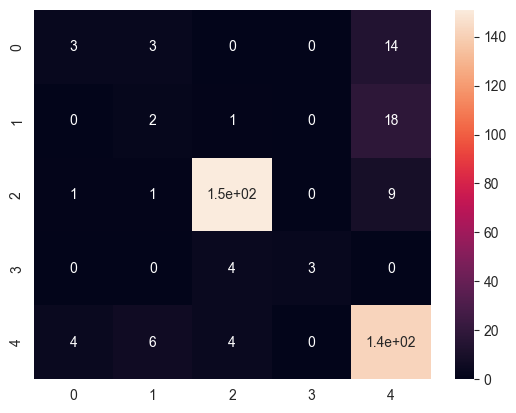

In [129]:
from sklearn.metrics import classification_report, confusion_matrix

print((classification_report(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))
confusion = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion, annot=True)
plt.show()

In [123]:
rf_model.predict([[10.9,10.6,2.8,4.5]])

array(['rain'], dtype=object)

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
knnpredicted=knn.predict(x_test)

In [125]:
accuracy_score(y_test, knnpredicted)

0.7240437158469946

In [126]:
knn.predict([[10.9,10.6,2.8,4.5]])

array(['rain'], dtype=object)